In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.pyplot import plot_descision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [8]:
X,y = make_circles(n_samples = 100,noise = 0.1,random_state = 1)

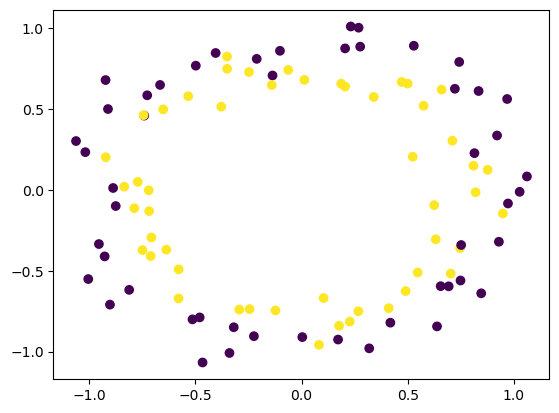

In [17]:
plt.scatter(X[:,0],X[:,1],c= y)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [21]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation = 'relu')) # Dense layer
model.add(Dense(1,activation = 'sigmoid')) # output Layer               

D:\AnacondaApp\Data\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [25]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 3500,verbose = 0)

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()


In [29]:
# If we had acccurate no of epochs,model performance had improved
# Early stopping mechaninsm - In keras which detects automatically after a point if we trained the model ,loss is increasing
# and accuracy is decreasing,detect the state during training and stops the model training at that point

# Feature - callback[use in keras to do some task after every epoch]

In [ ]:
plot_decision_regions(X_test,y_test.ravel(),clf = model,legend = 2)
plt.show()

#### Early stopping

In [34]:
model = Sequential()
model.add(Dense(256,input_dim =2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

D:\AnacondaApp\Data\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics= ['accuracy'])

In [38]:
# class Early stopping
callback = EarlyStopping(
    monitor = 'val_loss', # loss on new data(unseen data) measure. Accuracy can also be used if decreasing training stops
    min_delta=0.00001,
    patience= 20,
    verbose = 1, # shows at which epoch the training stops as shown in output Epoch 22: early stopping
    mode = 'auto',# Depends on the quantity which we are monitoring best # auto
    baseline = None,
    restore_best_weights=False)
    


In [40]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 3500,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.5047 - loss: 0.6962 - val_accuracy: 0.3500 - val_loss: 0.7144
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4594 - loss: 0.6964 - val_accuracy: 0.3500 - val_loss: 0.7121
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5523 - loss: 0.6914 - val_accuracy: 0.3500 - val_loss: 0.7126
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5641 - loss: 0.6905 - val_accuracy: 0.3500 - val_loss: 0.7137
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5641 - loss: 0.6893 - val_accuracy: 0.4000 - val_loss: 0.7146
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5266 - loss: 0.6903 - val_accuracy: 0.4000 - val_loss: 0.7149
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5500 - loss: 0.6859 - val_accuracy: 0.4500 - val_loss: 0.7162
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5445 - loss: 0.6862 - val_accuracy: 0.4500 -

In [ ]:
plot_decision_regions(X_test,y_test.ravel(),clf = model,legend = 2)
plt.show()